## Implementacion de ARIMA



In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA

C:\Users\hp\AppData\Local\Temp\ipykernel_1532\538234258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_util['fecha_ingreso'] = pd.to_datetime(data_util['fecha_ingreso'])


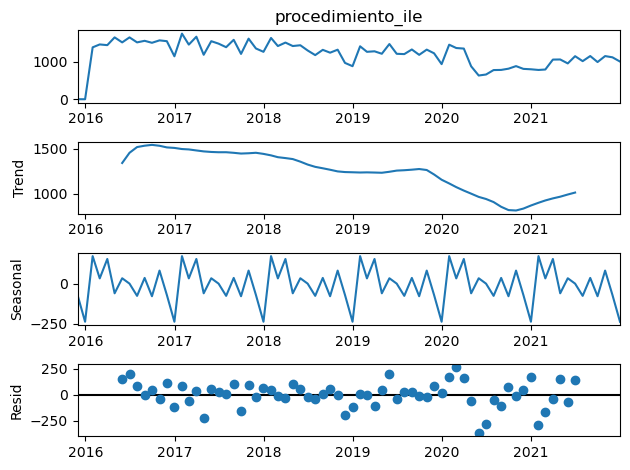

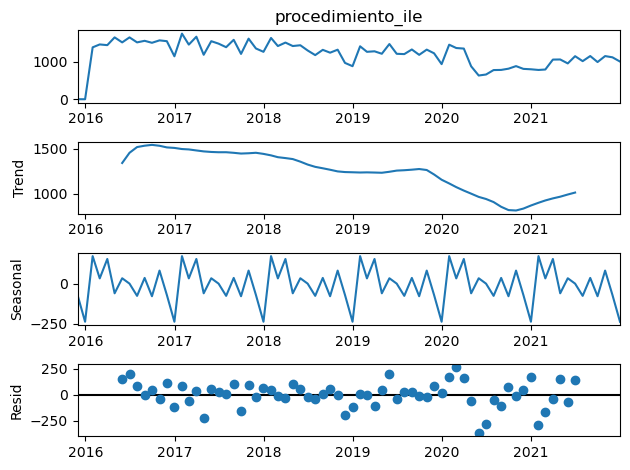

In [2]:
data = pd.read_csv('./datasets/Data_unido_2018_2021.csv', low_memory=False, sep=',')
data_util = data[['fecha_ingreso', 'edad', 'numero_hijos','numero_embarazos', 'procedimiento_ile']]

# Establecer la columna de fechas como el índice del DataFrame
data_util['fecha_ingreso'] = pd.to_datetime(data_util['fecha_ingreso'])
data_util.set_index('fecha_ingreso', inplace=True)
data_util.index = data_util.index.to_period('M').to_timestamp()

target = data_util.resample('M', closed='left').count()
# target

# Crear una serie temporal a partir de la columna de interrupciones de embarazo
ts = target['procedimiento_ile']
# Analizar la estacionalidad de los datos
decomposition = sm.tsa.seasonal_decompose(ts)
decomposition.plot()

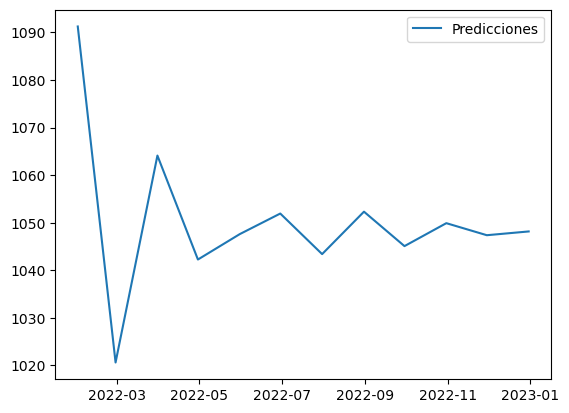

In [3]:
# Entrenar el modelo ARIMA
model = sm.tsa.ARIMA(ts, order=(3,1,1))
results = model.fit()

# Hacer predicciones futuras
predictions = results.forecast(steps=12, alpha=0.1)

import matplotlib.pyplot as plt

# Graficar las predicciones
plt.plot(predictions, label='Predicciones')
plt.legend()
plt.show()

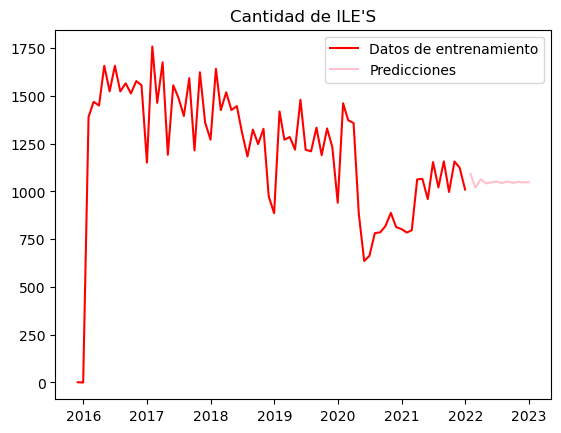

In [4]:
# Graficar los datos de entrenamiento
plt.plot(ts, label='Datos de entrenamiento', color='red')

# Graficar las predicciones
plt.plot(predictions, label='Predicciones', color='pink')

# Agregamos titulo
plt.title("Cantidad de ILE'S")

# Agregar leyenda
plt.legend()

# Mostrar gráfico
plt.show()

In [5]:
auto_arima(target['procedimiento_ile'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   74
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -500.110
Date:                              Thu, 19 Jan 2023   AIC                           1008.219
Time:                                      16:50:09   BIC                           1017.381
Sample:                                           0   HQIC                          1011.870
                                               - 74                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2060      0.101     -2.040      0.041      -0.404      -0.008
ar.S.L12       0.9174      0.099      9.279      0.000       0.724       1.111
ma.S.L12      -0.6588      0.248     -2.659      0.008      -1.144      -0.173
sigma2      4.768e+04   6968.970      6.842      0.000     3.4e+04    6.13e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               327.07
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                             1.68
Prob(H) (two-sided):                  0.01   Kurtosis:                        12.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
model = auto_arima(ts, seasonal=True, m=12)
print("p: ", model.order[0])
print("d: ", model.order[1])
print("q: ", model.order[2])

p:  1
d:  1
q:  0


## Natalidad

C:\Users\hp\AppData\Local\Temp\ipykernel_1532\3342078306.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_util['fecha_nacimiento'] = pd.to_datetime(data_util['fecha_nacimiento'])


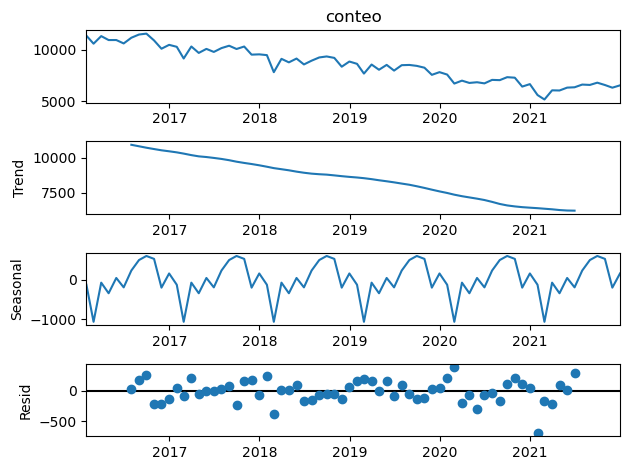

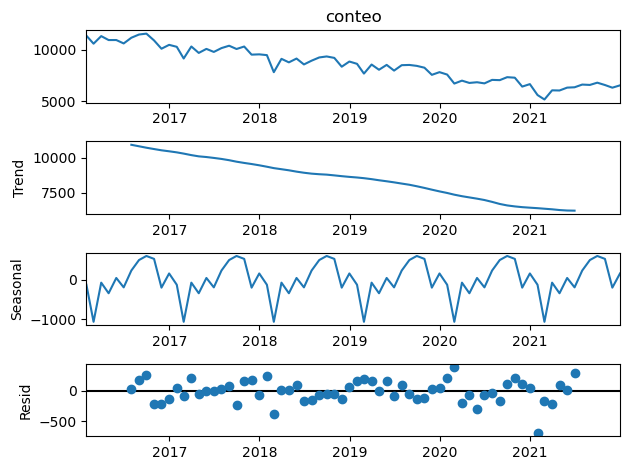

In [7]:
natalidad = pd.read_csv('./datasets/Natalidad_2016-2021.csv')
natalidad['conteo'] = natalidad['fecha_nacimiento']
natalidad.head(2)

data_util = natalidad[['fecha_nacimiento', 'tutora_1_edad', 'tutora_2_edad', 'conteo']]

# Establecer la columna de fechas como el índice del DataFrame
data_util['fecha_nacimiento'] = pd.to_datetime(data_util['fecha_nacimiento'])
data_util.set_index('fecha_nacimiento', inplace=True)
data_util.index = data_util.index.to_period('M').to_timestamp()

target = data_util.resample('M', closed='left').count()
# target

# Crear una serie temporal a partir de la columna de natalidad
ts = target['conteo']
# Analizar la estacionalidad de los datos
decomposition = sm.tsa.seasonal_decompose(ts)
decomposition.plot()

c:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


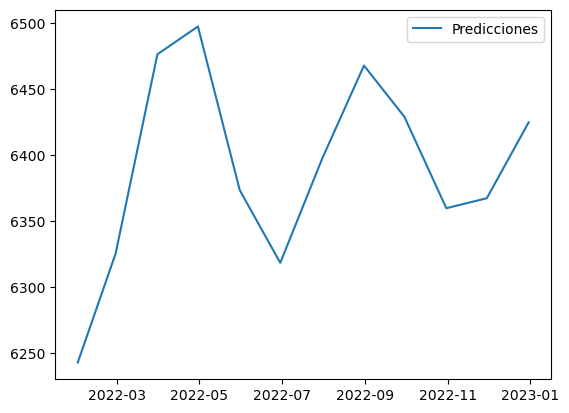

In [8]:
# Entrenar el modelo ARIMA
model = sm.tsa.ARIMA(ts, order=(3,1,2))
results = model.fit()

# Hacer predicciones futuras
predictions_nata = results.forecast(steps=12, alpha=0.1)

import matplotlib.pyplot as plt

# Graficar las predicciones
plt.plot(predictions_nata, label='Predicciones')
plt.legend()
plt.show()

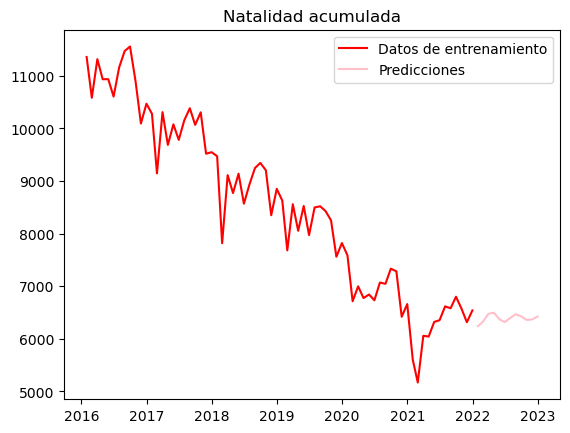

In [9]:
# Graficar los datos de entrenamiento
plt.plot(ts, label='Datos de entrenamiento', color='red')

# Graficar las predicciones
plt.plot(predictions_nata, label='Predicciones', color='pink')

# Agregamos titulo
plt.title("Natalidad acumulada")

# Agregar leyenda
plt.legend()

# Mostrar gráfico
plt.show()

In [10]:
auto_arima(target['conteo'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   72
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -514.913
Date:                            Thu, 19 Jan 2023   AIC                           1039.826
Time:                                    16:51:04   BIC                           1051.140
Sample:                                         0   HQIC                          1044.325
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -10.1338      7.574     -1.338      0.181     -24.978       4.711
ma.L1         -0.3467      0.104     -3.326      0.001      -0.551      -0.142
ar.S.L12       0.8853      0.075     11.866      0.000       0.739       1.032
ma.S.L12      -0.4389      0.190     -2.310      0.021      -0.811      -0.066
sigma2      7.809e+04   1.21e+04      6.452      0.000    5.44e+04    1.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.45
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.92
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
model = auto_arima(ts, seasonal=True, m=12)
print("p: ", model.order[0])
print("d: ", model.order[1])
print("q: ", model.order[2])

p:  0
d:  1
q:  1
